# SNCF - Analise de la Fréquentation des gares

In [155]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import numpy as np

## Première analise du dataset : variation de la fréquentation du réseau sur le temps

In [156]:
data = pd.read_csv('./data/frequentation-gares.csv', delimiter=';')

In [157]:
usersOverYears = dict()
usersOverYears['2015'] = data['Total Voyageurs 2015'].sum()
usersOverYears['2016'] = data['Total Voyageurs 2016'].sum()
usersOverYears['2017'] = data['Total Voyageurs 2017'].sum()
usersOverYears['2018'] = data['Total Voyageurs 2018'].sum()
usersOverYears['2019'] = data['Total Voyageurs 2019'].sum()
usersOverYears['2020'] = data['Total Voyageurs 2020'].sum()
usersOverYearsDf = pd.DataFrame.from_dict(usersOverYears, orient='index')
# rename columns
usersOverYearsDf.index.names = ['Year']
usersOverYearsDf = usersOverYearsDf.rename(columns = {0:'Users'})

<AxesSubplot: xlabel='Year', ylabel='Users'>

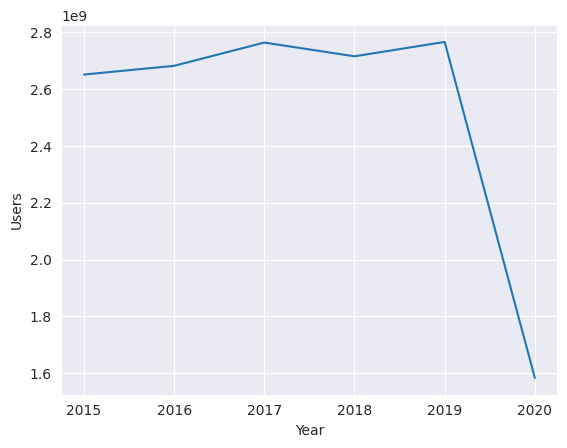

In [158]:
sb.lineplot(data=usersOverYearsDf, x="Year", y="Users")

On remarque une énorme chute du nombre d'utilisateur du réseau SNCF en 2020 (-1 milliard)

In [159]:
allUsersOverYears = dict()
allUsersOverYears['2015'] = data['Total Voyageurs + Non voyageurs 2015'].sum()
allUsersOverYears['2016'] = data['Total Voyageurs + Non voyageurs 2016'].sum()
allUsersOverYears['2017'] = data['Total Voyageurs + Non voyageurs 2017'].sum()
allUsersOverYears['2018'] = data['Total Voyageurs + Non voyageurs 2018'].sum()
allUsersOverYears['2019'] = data['Total Voyageurs + Non voyageurs 2019'].sum()
allUsersOverYears['2020'] = data['Total Voyageurs + Non voyageurs 2020'].sum()
allUsersOverYearsDf = pd.DataFrame.from_dict(allUsersOverYears, orient='index')
# rename columns
allUsersOverYearsDf.index.names = ['Year']
allUsersOverYearsDf = allUsersOverYearsDf.rename(columns = {0:'All Users'})

<AxesSubplot: xlabel='Year', ylabel='All Users'>

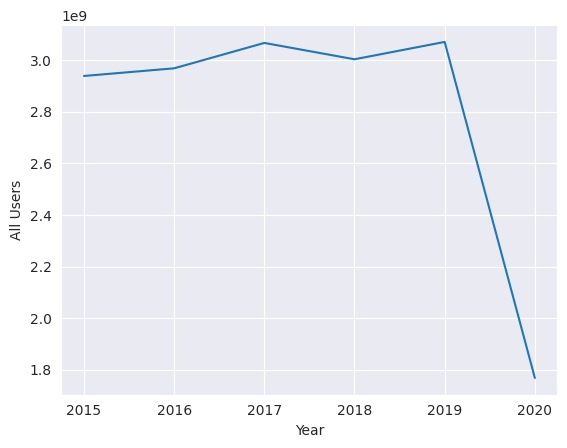

In [160]:
sb.lineplot(data=allUsersOverYearsDf, x="Year", y="All Users")

On remarque la même chute du nombre d'utilisateur + visiteur du réseau SNCF en 2020

In [161]:
diffUsersandAllUsersOverYears = dict()
diffUsersandAllUsersOverYears['2015'] = allUsersOverYears['2015'] - usersOverYears['2015']
diffUsersandAllUsersOverYears['2016'] = allUsersOverYears['2016'] - usersOverYears['2016']
diffUsersandAllUsersOverYears['2017'] = allUsersOverYears['2017'] - usersOverYears['2017']
diffUsersandAllUsersOverYears['2018'] = allUsersOverYears['2018'] - usersOverYears['2018']
diffUsersandAllUsersOverYears['2019'] = allUsersOverYears['2019'] - usersOverYears['2019']
diffUsersandAllUsersOverYears['2020'] = allUsersOverYears['2020'] - usersOverYears['2020']
diffUsersandAllUsersOverYearsDf = pd.DataFrame.from_dict(diffUsersandAllUsersOverYears, orient='index')
# rename columns
diffUsersandAllUsersOverYearsDf.index.names = ['Year']
diffUsersandAllUsersOverYearsDf = diffUsersandAllUsersOverYearsDf.rename(columns = {0:'Diff'})

<AxesSubplot: xlabel='Year', ylabel='Diff'>

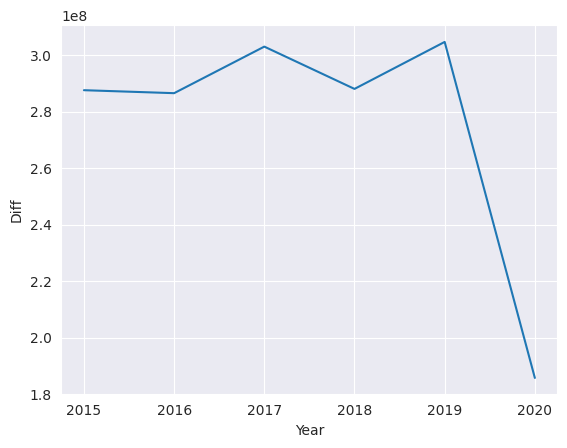

In [162]:
sb.lineplot(data=diffUsersandAllUsersOverYearsDf, x="Year", y="Diff")

Le troisième graphique fréquentation des visiteurs du réseau SNCF, et ce graphique suit aussi la tendance que les deux autres graphiques

#### Conclusion:
On peut conclure que en 2020 il y a un évènement qui a considérablement réduit la fréquentation du réseau. Cet évènement est sans aucun doute le confinement dû aux restrictions sanitaires liées à la pandémie du Covid-19

## Deuxième analise du dataset : fréquentation des gares

### Fréquentation du réseau sur le temps par gare
de 2015 à 2019

In [199]:
moyUsers = []
for index, row in data.iterrows():
    moyUsers.append((row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015'])/4)

# condition to avoid duplicate
if not "Moyenne Voyageurs" in data:
    data.insert(loc=data.shape[1], column="Moyenne Voyageurs", value=moyUsers, allow_duplicates=True)

<AxesSubplot: xlabel='Moyenne Voyageurs', ylabel='Nom de la gare'>

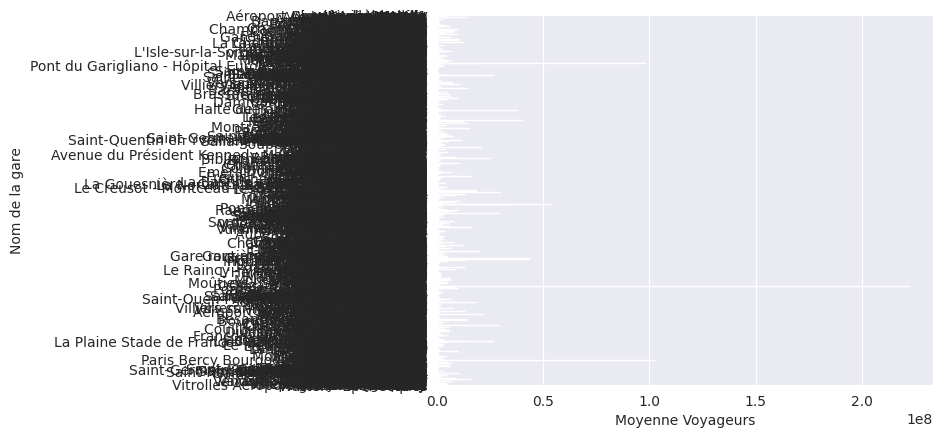

In [200]:
sb.barplot(data, x="Moyenne Voyageurs", y="Nom de la gare")

Les données de ce graphique sont illisibles, nous allons donc affiner et ne prendre que les valeurs et plus hautes d'un coté et les plus basses de l'autre

In [201]:
data['Moyenne Voyageurs'].describe()

count    2.967000e+03
mean     8.433991e+05
std      5.595306e+06
min      0.000000e+00
25%      8.004900e+03
50%      4.226400e+04
75%      2.265586e+05
max      2.222549e+08
Name: Moyenne Voyageurs, dtype: float64

<AxesSubplot: xlabel='Moyenne Voyageurs', ylabel='Nom de la gare'>

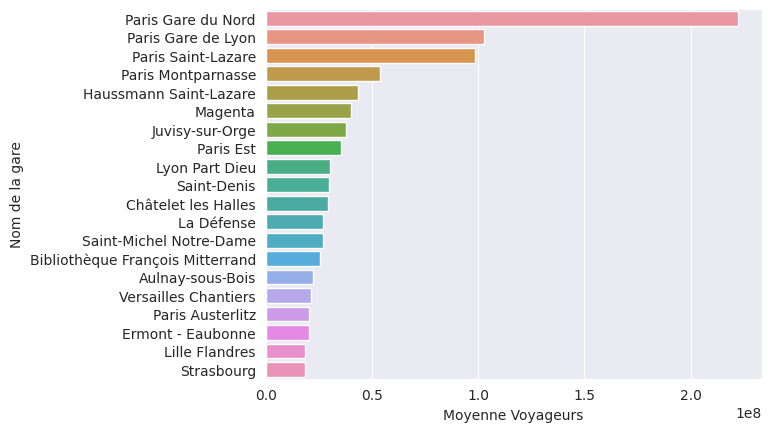

In [202]:
sb.barplot(data.nlargest(20, "Moyenne Voyageurs")  , x="Moyenne Voyageurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Voyageurs', ylabel='Nom de la gare'>

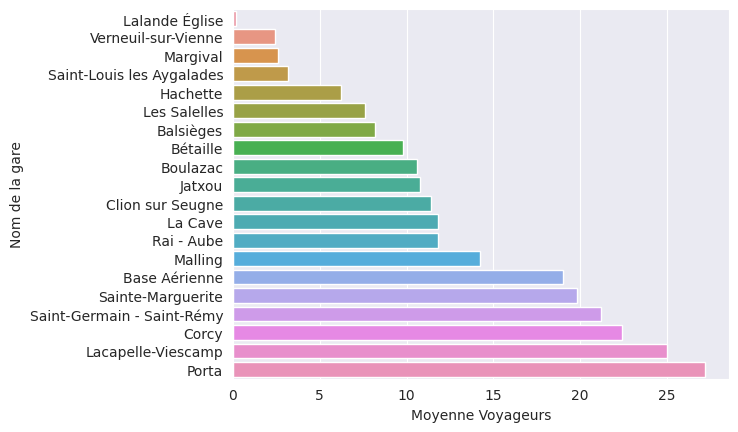

In [205]:
sb.barplot(data[data['Moyenne Voyageurs'] > 0].nsmallest(20, "Moyenne Voyageurs"), x="Moyenne Voyageurs", y="Nom de la gare")
# remove closed station with 0 user